# EXPLORATORY DATA ANALYSIS

<div style="background-color: black|; padding: 10px; border-radius: 5px;">
    

Exploratory Data Analysis (EDA) is a critical first step before starting clustering to understand the structure, relationships, and characteristics of the dataset. Here’s how to perform EDA for clustering:

1. Data Overview: Start by examining the dataset for size, data types, and missing values. Check the number of features and samples to understand the dataset's complexity.

2. Missing Data Handling: Identify and handle missing values through imputation or removal to ensure clustering algorithms can process the data accurately.

3. Visualizations: Use pair plots, heatmaps, and scatter plots to explore relationships and clusters within the data visually.
    
    </div>

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

## Import Data


In [138]:
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/student_dropout_behavior_dataset.csv")
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


## Check for missing values

In [139]:
print(df.isnull().sum())

student_id                 0
name                       0
age                        0
gender                     0
quiz1_marks                0
quiz2_marks                0
quiz3_marks                0
total_assignments          0
assignments_submitted    300
midterm_marks              0
final_marks                0
previous_gpa               0
total_lectures             0
lectures_attended          0
total_lab_sessions         0
labs_attended              0
dtype: int64


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             300 non-null    int64  
 1   name                   300 non-null    object 
 2   age                    300 non-null    int64  
 3   gender                 300 non-null    object 
 4   quiz1_marks            300 non-null    float64
 5   quiz2_marks            300 non-null    float64
 6   quiz3_marks            300 non-null    float64
 7   total_assignments      300 non-null    int64  
 8   assignments_submitted  0 non-null      float64
 9   midterm_marks          300 non-null    float64
 10  final_marks            300 non-null    float64
 11  previous_gpa           300 non-null    float64
 12  total_lectures         300 non-null    int64  
 13  lectures_attended      300 non-null    int64  
 14  total_lab_sessions     300 non-null    int64  
 15  labs_a

## Check Unique Value

In [141]:
print("Unique values for name:", df['name'].unique())
print("Unique values for student_id:", df['student_id'].unique())
print("Unique values for assignments_submitted:", df['assignments_submitted'].unique())

Unique values for name: ['Kristina Vaughan' 'Rodney Daniels' 'Jose Nash' 'Nicole Martin'
 'Shelby Smith' 'Austin Griffin' 'Crystal Jordan' 'Sandra Patterson'
 'Rachael Miles' 'Matthew Rice' 'Lawrence Powers' 'Joshua Henry'
 'Jamie Jones' 'Rita Olson' 'Matthew Williams' 'Terry Little'
 'Doris Larson' 'Gregg Gonzales' 'Pamela Jones' 'Mark Allen'
 'Sherri Wheeler' 'Jeffrey Martin' 'Sandra Smith' 'Colton Bradley'
 'Amy Johnson' 'Ryan Lyons' 'Dr. Andrew Chang' 'Michael Williamson Jr.'
 'Jessica Hart' 'Stephanie Gonzales' 'Dr. Jamie Mclaughlin' 'Diana Martin'
 'Jessica Russell' 'Christopher Buchanan' 'Sean Bates' 'Stephen Khan'
 'Patricia Macias' 'Michael Davis' 'Richard Savage' 'Maria Pennington'
 'Stephanie Yoder' 'Maria Rasmussen' 'Melanie Cox' 'Carol Walls'
 'Brandon Garcia' 'David Williams' 'Eric Hodge' 'Daniel Nguyen'
 'Elizabeth Cook' 'Tracy Myers' 'Ernest Payne' 'Richard Rich'
 'Jonathan Francis' 'Olivia Jones' 'Ernest Allen' 'Jacob Ramirez'
 'Jay Morris' 'Michelle Schultz' 'Lisa Ing

## Drop Column

In [142]:
columns_to_drop = ['name', 'student_id', 'assignments_submitted', 'total_assignments', 'total_lectures', 'total_lab_sessions']
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,4


<span style="color: blue; font-style: italic;">No missing value in this data, good to proceed with descriptive analytics!</span>



## Check Data Information



In [143]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                300 non-null    int64  
 1   gender             300 non-null    object 
 2   quiz1_marks        300 non-null    float64
 3   quiz2_marks        300 non-null    float64
 4   quiz3_marks        300 non-null    float64
 5   midterm_marks      300 non-null    float64
 6   final_marks        300 non-null    float64
 7   previous_gpa       300 non-null    float64
 8   lectures_attended  300 non-null    int64  
 9   labs_attended      300 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 23.6+ KB


## Descriptive Statistics

In [144]:
df.describe()

,student_id,age,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,0.0,300.000000,300.000000,300.000000,300.0,300.000000,300.0,300.000000
mean,150.500000,21.550000,7.254667,5.866667,5.469000,5.0,NaN,19.969000,37.375000,2.806033,12.0,6.013333,6.0,3.110000
std,86.746758,2.241483,1.611791,2.414786,2.711083,0.0,NaN,8.272229,11.796774,0.732694,0.0,3.726407,0.0,1.982676
min,1.000000,18.000000,2.800000,0.000000,0.000000,5.0,NaN,0.000000,0.000000,0.610000,12.0,0.000000,6.0,0.000000
25%,75.750000,20.000000,6.075000,4.000000,3.600000,5.0,NaN,14.225000,29.875000,2.327500,12.0,3.000000,6.0,1.000000
50%,150.500000,22.000000,7.300000,5.800000,5.600000,5.0,NaN,21.350000,39.600000,2.800000,12.0,6.000000,6.0,3.000000
75%,225.250000,23.000000,8.400000,7.700000,7.200000,5.0,NaN,27.425000,49.550000,3.320000,12.0,9.000000,6.0,5.000000
max,300.000000,25.000000,10.000000,10.000000,10.000000,5.0,NaN,30.000000,50.000000,4.000000,12.0,12.000000,6.0,6.000000



## Visualizations

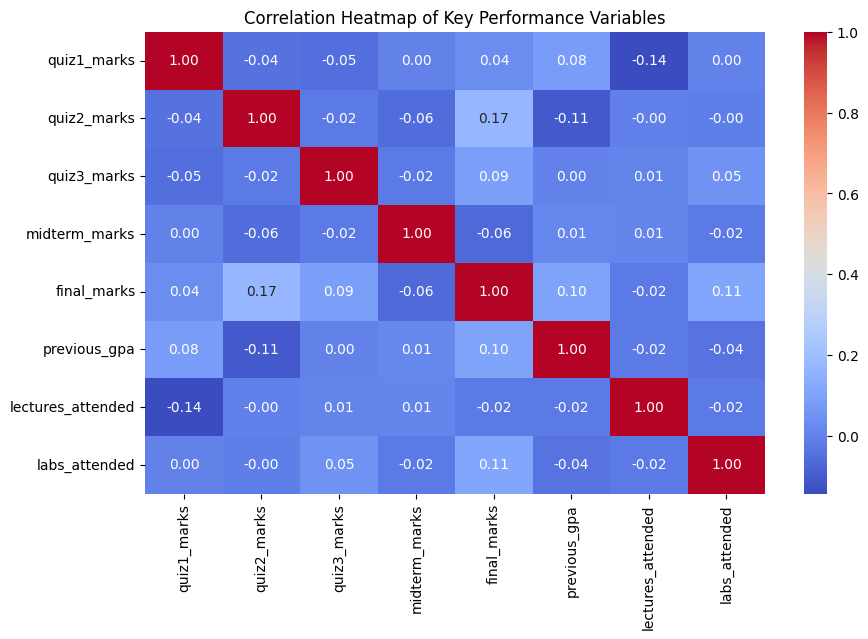

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Key performance variables
key_vars = [
    "quiz1_marks", "quiz2_marks", "quiz3_marks", 
    "midterm_marks", "final_marks",
    "previous_gpa",
    "lectures_attended", "labs_attended"
]

plt.figure(figsize=(10, 6))
sns.heatmap(df[key_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Performance Variables")
plt.show()

Hasil correlation heatmap menunjukkan bahwa hubungan antar variabel performa mahasiswa cenderung lemah secara keseluruhan, ditandai dengan nilai korelasi yang mendekati 0. Nilai kuis (quiz1, quiz2, dan quiz3) tidak memiliki hubungan yang kuat dengan nilai ujian tengah semester maupun nilai final, yang terlihat dari korelasi kecil antara quiz marks dan final_marks. Korelasi antara previous_gpa dengan final_marks juga rendah, menandakan bahwa kemampuan akademik sebelumnya tidak sepenuhnya menentukan performa akhir dalam kelas ini. Sementara itu, tingkat kehadiran baik pada kuliah maupun sesi laboratorium tidak menunjukkan hubungan yang signifikan dengan nilai ujian atau kuis. Secara keseluruhan, pola ini menunjukkan bahwa tidak ada satu variabel pun dalam kumpulan data ini yang menjadi prediktor dominan terhadap performa akhir mahasiswa, sehingga kemungkinan besar performa dipengaruhi oleh faktor-faktor lain di luar variabel yang tersedia.

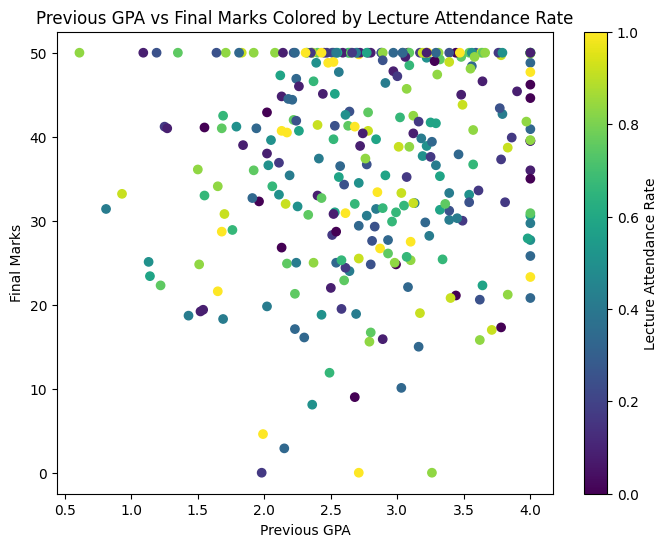

In [146]:
import matplotlib.pyplot as plt

# Create attendance rate
df["lecture_attendance_rate"] = df["lectures_attended"] / df["total_lectures"]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df["previous_gpa"],
    df["final_marks"],
    c=df["lecture_attendance_rate"],
    cmap="viridis"
)

plt.colorbar(scatter, label="Lecture Attendance Rate")
plt.xlabel("Previous GPA")
plt.ylabel("Final Marks")
plt.title("Previous GPA vs Final Marks Colored by Lecture Attendance Rate")
plt.show()


Scatter plot yang menunjukkan hubungan antara previous GPA dan final marks, dengan warna merepresentasikan lecture attendance rate, memperlihatkan bahwa tidak terdapat pola hubungan yang jelas antara GPA sebelumnya dan nilai akhir mahasiswa. Titik-titik tersebar secara acak di seluruh rentang nilai final, baik untuk GPA rendah maupun tinggi. Selain itu, tingkat kehadiran kuliah (ditandai oleh gradasi warna) juga tidak menunjukkan tren yang konsisten. Mahasiswa dengan kehadiran tinggi maupun rendah sama-sama tersebar dalam rentang nilai akhir yang tinggi maupun rendah. Ini mengindikasikan bahwa pada dataset ini, baik previous GPA maupun tingkat kehadiran kuliah bukanlah prediktor yang kuat terhadap performa akhir mahasiswa, dan kemungkinan terdapat faktor lain di luar kedua variabel ini yang lebih berpengaruh terhadap final marks.

In [147]:
df_cleaned.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,4


## Encoding

In [148]:
from sklearn.preprocessing import LabelEncoder

# Re-initialize df_encoded from df to ensure original 'ocean_proximity' column is present
df_encoded = df_cleaned.copy()

# 1. One-Hot Encoding
# Columns: Gender

one_hot_map = {
    'gender': {'Female': 0, 'Male': 1},
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

df_encoded.sample(n = 5)

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
177,22,1,9.3,1.7,4.4,8.8,20.6,3.62,3,1
292,22,1,5.7,1.4,7.0,30.0,37.9,3.46,4,5
202,21,1,5.6,8.2,4.6,30.0,29.9,2.96,8,0
176,18,1,6.9,8.9,7.1,16.3,50.0,0.61,10,1
287,24,1,8.5,7.5,2.7,30.0,32.0,3.36,9,2


Boxplot for all numerical features

In [149]:
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'gender' in numerical_cols:
    numerical_cols.remove('gender')
    numerical_cols.remove('age')
    numerical_cols.remove('quiz1_marks')
    numerical_cols.remove('quiz2_marks')
    numerical_cols.remove('quiz3_marks')
    numerical_cols.remove('midterm_marks')
    numerical_cols.remove('lectures_attended')
    numerical_cols.remove('labs_attended')

print(f"Numerical columns (excluding Education): {numerical_cols}")

Numerical columns (excluding Education): ['final_marks', 'previous_gpa']


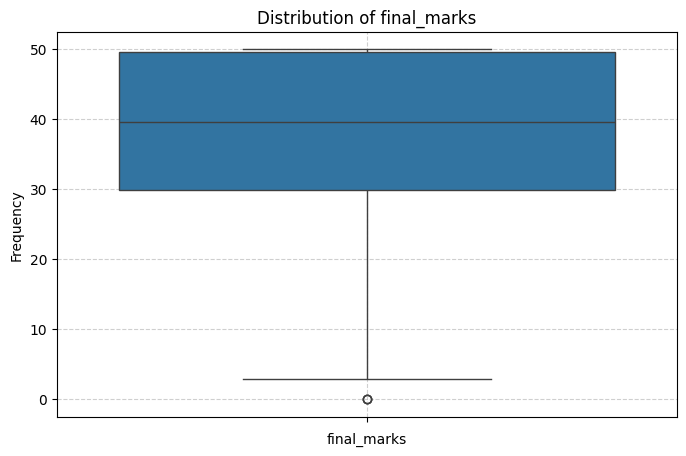

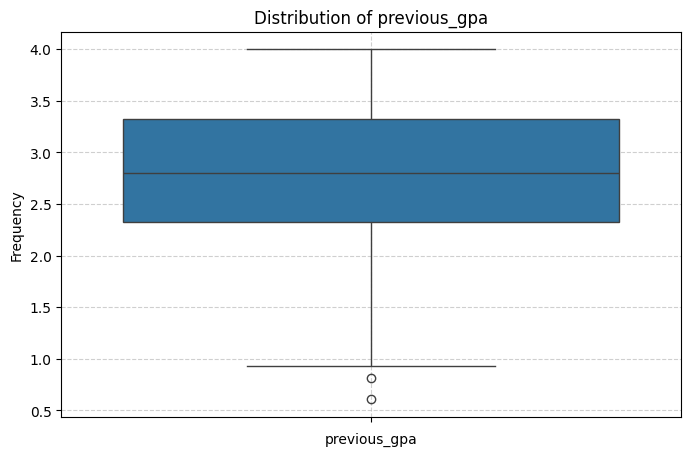

In [150]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(df_encoded[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

#### Boxplot 1
Boxplot nilai final_marks menunjukkan bahwa sebagian besar mahasiswa memperoleh nilai akhir antara sekitar 30 hingga 50, yang terlihat dari rentang interkuartil (IQR). Median nilai akhir berada di sekitar 40, menandakan bahwa separuh mahasiswa mendapatkan nilai di atas 40 dan separuh lainnya di bawah angka tersebut. Rentang nilai cukup lebar, dengan whisker bawah turun hingga mendekati nilai 0 dan whisker atas mencapai batas maksimum sekitar 50. Terdapat juga satu outlier rendah yang berada di bawah nilai minimal whisker, menunjukkan adanya satu mahasiswa dengan performa akhir yang jauh lebih rendah dibandingkan lainnya. Secara keseluruhan, distribusi nilai akhir cenderung tinggi dan relatif merata pada rentang 30–50, dengan sedikit mahasiswa yang mendapatkan nilai sangat rendah.

#### Boxplot 2
Boxplot untuk previous_gpa menunjukkan bahwa sebagian besar mahasiswa memiliki GPA sebelumnya pada rentang sekitar 2.3 hingga 3.3, yang tercermin dari interquartile range (IQR). Median berada di sekitar 2.8, menandakan bahwa nilai GPA sebelumnya cenderung berada pada tingkat sedang hingga cukup baik. Whisker atas mencapai nilai sekitar 4.0, mengindikasikan bahwa terdapat mahasiswa dengan performa akademik sebelumnya yang sangat baik. Di sisi lain, whisker bawah turun hingga mendekati 1.0, dan terdapat beberapa outlier rendah di bawah nilai tersebut, menunjukkan adanya mahasiswa dengan GPA sebelumnya yang jauh lebih rendah dibandingkan mayoritas kelompok. Secara keseluruhan, distribusi previous_gpa cukup beragam, dengan mayoritas mahasiswa menunjukkan performa akademik menengah, namun tetap terlihat adanya perbedaan ekstrem di kedua ujung distribusi.

# DATA STANDARDIZATION

In [151]:
scaler = StandardScaler()

df_transformed = df_encoded.copy()

# Apply StandardScaler to the identified numerical columns
df_transformed = scaler.fit_transform(df_transformed)

# Convert the numpy array back to a DataFrame with original column names for display
df_transformed = pd.DataFrame(df_transformed, columns=df_encoded.columns)

# Display the head of the transformed DataFrame to verify
print("DataFrame after standardizing numerical columns:")
df_transformed.head()

DataFrame after standardizing numerical columns:


,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,-1.139540,1.033908,0.463198,-0.069135,0.713452,1.214638,-0.074297,-0.322683,-0.541191,-1.065997
1,-0.245783,1.033908,1.706127,0.843441,-0.505808,0.657631,-0.371484,-0.555091,-1.347601,0.954850
2,-1.139540,-0.967204,0.152466,-1.935767,-1.909804,-0.674341,-1.067750,0.251502,-1.616404,-1.571208
3,-0.245783,1.033908,-1.276902,-1.396518,1.637133,-0.274750,0.307801,-1.539408,0.802826,-1.571208
4,-0.245783,-0.967204,-0.841877,0.179750,-1.281700,0.463890,-0.541305,-0.377367,0.265219,0.449638


#  PRINCIPAL COMPONENT ANALYSIS


Ref: https://statisticsglobe.com/principal-component-analysis-python

First, we should choose the ideal number of components before interpreting the results. One alternative is to conduct a PCA for all or an arbitrarily large number of components, then visualize the percentage of explained variance or the eigenvalues per component using a scree plot. Based on the graph, the optimal number can be selected. Let’s run our PCA for ten components!

In [152]:
pca = PCA(n_components=10) #why 12 bcs that is total column we have

pca.fit_transform(df_transformed)

array([[ 0.97007566, -0.2512717 , -0.25805316, ..., -0.85514088,
         0.45257755,  0.12896213],
       [ 0.45724346, -1.36835954, -1.83594652, ..., -0.2551258 ,
         0.22929964,  0.80266358],
       [ 1.96403679, -1.12191215,  1.15890334, ...,  1.86424152,
         0.21494869, -0.84807189],
       ...,
       [-1.45037555,  1.72779316, -0.85169893, ...,  2.05382793,
        -0.84592089,  0.09354937],
       [-0.19650367, -0.58542457, -1.07754827, ..., -0.28224409,
        -1.59742038,  1.04536431],
       [-0.4313977 ,  0.12781585, -0.27204428, ..., -0.95386868,
        -0.22568525, -0.57699358]])

Once we have our PCA done, we can extract the proportion of variance explained and the eigenvalues as follows.

In [153]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

We will plot the scree plot using the proportion of variance explained.

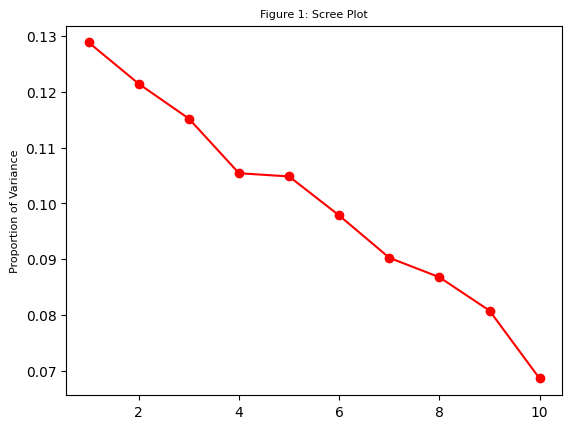

In [154]:
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [155]:
pca_full = PCA().fit(df_transformed)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("\nExplained variance per PC (percent) & cumulative:")
for i, (e, c) in enumerate(zip(explained*100, cum_explained*100), start=1):
    print(f"PC{i:02d}: {e:.2f}%  |  Cumulative: {c:.2f}%")


Explained variance per PC (percent) & cumulative:
PC01: 12.88%  |  Cumulative: 12.88%
PC02: 12.14%  |  Cumulative: 25.02%
PC03: 11.52%  |  Cumulative: 36.54%
PC04: 10.54%  |  Cumulative: 47.08%
PC05: 10.48%  |  Cumulative: 57.57%
PC06: 9.78%  |  Cumulative: 67.35%
PC07: 9.03%  |  Cumulative: 76.38%
PC08: 8.68%  |  Cumulative: 85.06%
PC09: 8.08%  |  Cumulative: 93.14%
PC10: 6.86%  |  Cumulative: 100.00%


Based on the results, the first seven principal components explain a cumulative 76.38% of the variance in the data, which falls within the recommended threshold of 70–80%. Since 76.38% represents a substantial portion of the total variance, retaining the first seven principal components is sufficient and appropriate for further analysis.

In [156]:
pca = PCA(n_components=7)
PC = pca.fit_transform(df_transformed)

Let’s store the component scores in a DataFrame and check it via the head() method!

In [157]:
df_pca = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.970076,-0.251272,-0.258053,-0.062800,0.222625,0.235991,-1.994340
1,0.457243,-1.368360,-1.835947,-0.729976,0.223127,1.337209,-0.170171
2,1.964037,-1.121912,1.158903,-2.088251,-0.433858,-0.993234,-0.394735
3,0.905380,1.742435,-0.160315,1.173438,0.828061,-1.455974,-1.314544
4,0.263028,0.942491,0.606325,-0.768840,-0.450677,1.027836,0.575022


Now, we can form the biplot. For further information on how to do this, see Biplot in Python. Here, we will use a user-defined biplot() function for the implementation.

In [158]:
def biplot(score,coef,labels=None, colors=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    if colors is not None:
        unique_clusters = np.unique(colors)
        for cluster_label in unique_clusters:
            # Filter points belonging to the current cluster
            cluster_mask = (colors == cluster_label)
            plt.scatter(xs[cluster_mask] * scalex,
                        ys[cluster_mask] * scaley,
                        s=5,
                        label=f'Cluster {int(cluster_label)}')
        plt.legend()
    else:
        plt.scatter(xs * scalex,ys * scaley,
                    s=5,
                    color='orange') # Changed 'color' to 'c' and used 'colors' parameter

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.2, # Adjusted position
                 coef[i,1] * 1.2, # Adjusted position
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')
    # --------------------------------------
    # ADD DOTTED REFERENCE LINES (like example)
    # --------------------------------------
    plt.axhline(0, color='black', linestyle='dotted', linewidth=1)
    plt.axvline(0, color='black', linestyle='dotted', linewidth=1)

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))


After defining our function, we just have to call it.



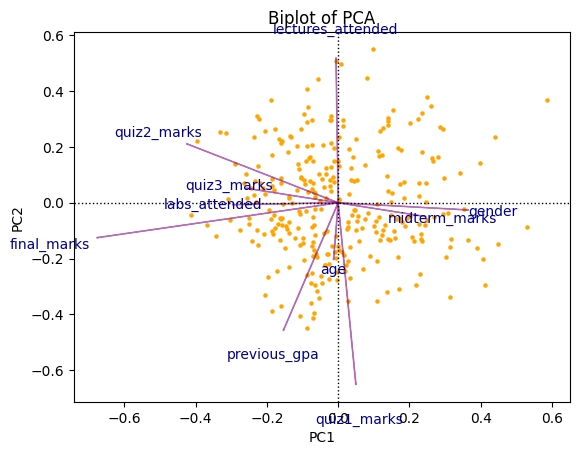

In [159]:
plt.title('Biplot of PCA')

biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns))

○ What does PC1 represent in terms of original variables? 

PC1 menggambarkan kombinasi variabel yang berkaitan dengan kinerja akademik dan partisipasi. Arah loading menunjukkan bahwa variabel seperti quiz1_marks, quiz2_marks, quiz3_marks, midterm_marks, final_marks, serta labs_attended memiliki kontribusi besar pada PC1. Artinya, PC1 dapat dipahami sebagai komponen utama yang menggambarkan performa akademik keseluruhan dan tingkat keterlibatan dalam kegiatan perkuliahan.

○ What does PC2 represent? 

PC2 lebih banyak menangkap variasi yang berasal dari karakteristik personal dan latar belakang mahasiswa, seperti age, gender, serta previous_gpa, yang tampak memiliki loading kuat pada arah PC2. Dengan demikian, PC2 dapat dianggap sebagai komponen utama yang menggambarkan faktor demografis dan kemampuan awal mahasiswa.

○ Which variables are most important for each PC?

Untuk PC1, variabel paling penting adalah quiz1_marks, quiz2_marks, quiz3_marks, midterm_marks, final_marks, dan labs_attended karena vektornya panjang dan mengarah sejajar dengan sumbu PC1.
Untuk PC2, variabel yang paling berpengaruh adalah age, gender, dan previous_gpa, yang memiliki vector loading kuat ke arah sumbu PC2.

#  K-MEANS CLUSTERING

You need to decide how many clusters (K) you want to create. One way to do this is by using the elbow method, which plots the within-cluster sum of squares (WCSS) for different values of K and looks for the "elbow" point where the WCSS starts to level off.

C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

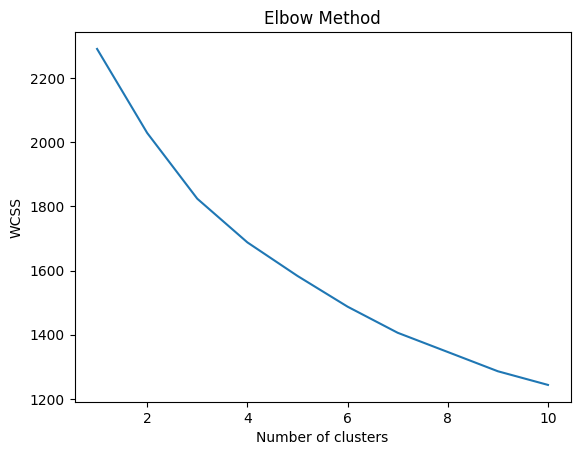

In [160]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [161]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  2291.317393
1                   2  2029.256089
2                   3  1824.108682
3                   4  1687.907518
4                   5  1583.261567
5                   6  1487.391045
6                   7  1405.966076
7                   8  1345.974498
8                   9  1285.895377
9                  10  1243.300570


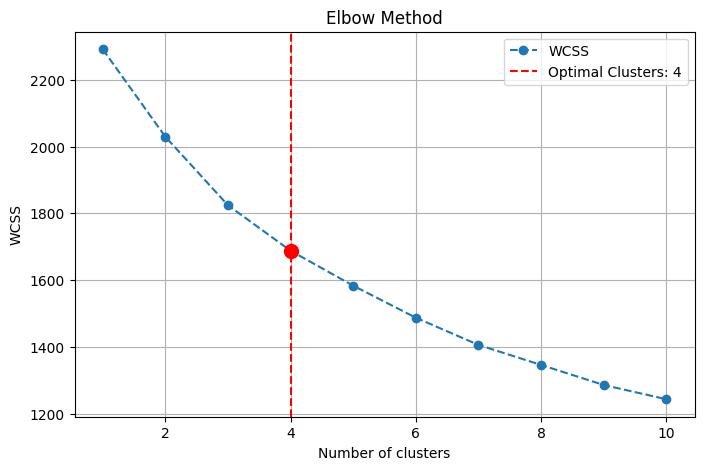

The optimal number of clusters is: 4


In [162]:
from kneed import KneeLocator  # Library to detect the "knee" point

# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")


In [163]:
# Fit K-Means to the data with optimal cluster
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++',random_state=42)
kmeans_cluster = kmeans.fit_predict(df_pca)

# Add the cluster labels to the DataFrame
df['KMeans'] = kmeans_cluster
df_transformed['KMeans'] = kmeans_cluster

C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [164]:
# Evaluation
ss = silhouette_score(df_pca, kmeans_cluster)
print(ss)

0.11313734013137551


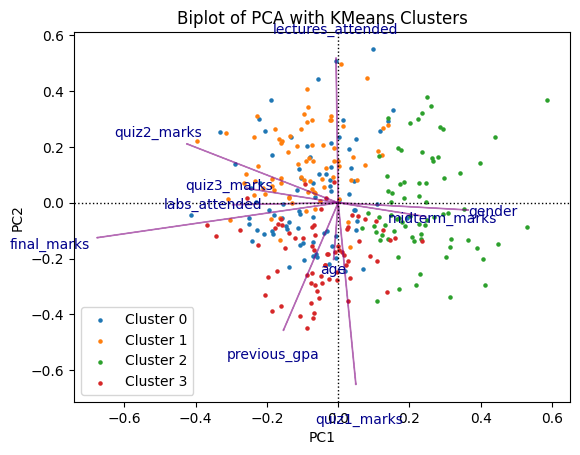

In [165]:
plt.title('Biplot of PCA with KMeans Clusters')
biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns),
       colors=df_transformed['KMeans'])
plt.show()

In [166]:
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,lecture_attendance_rate,KMeans
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1,0.333333,2
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5,0.083333,0
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0,0.000000,2
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0,0.750000,2
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4,0.583333,1


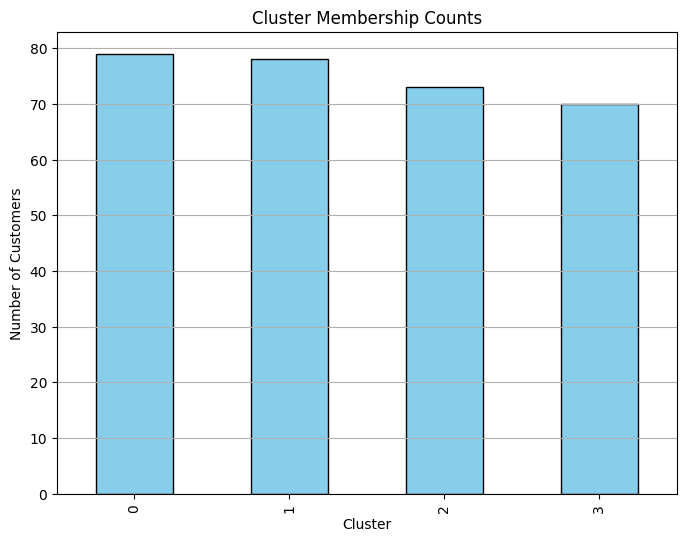

In [167]:
cluster_counts = df['KMeans'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

#### Cluster Profiling

1. Cluster 0: performa menengah–atas, nilai kuis dan midterm cukup baik, kehadiran stabil.
2. Cluster 1: nilai tinggi dan kehadiran kuat – high achievers.
3. Cluster 2: performa menengah, nilai tidak terlalu tinggi namun tidak rendah – moderately performing students.
4. Cluster 3: nilai rendah, kehadiran rendah – at-risk students.

#### Interpretasi via PCA Biplot

1. PC1 merepresentasikan performa akademik (nilai kuis, midterm, final, serta kehadiran).
Maka cluster yang berada di arah positif PC1 biasanya berisi mahasiswa dengan nilai lebih tinggi dan kehadiran baik (contoh: cluster 1).
Sebaliknya, cluster yang berada di arah negatif PC1 menggambarkan performa akademik lebih rendah (contoh: cluster 3).

2. PC2 menangkap variasi berdasarkan karakteristik personal seperti usia, previous GPA, dan gender.
Cluster yang berada di atas (positif PC2) mungkin cenderung terkait mahasiswa dengan previous GPA lebih baik atau karakteristik tertentu.
Cluster yang berada di bawah (negatif PC2) menunjukkan kelompok yang lebih dipengaruhi oleh faktor seperti usia atau GPA sebelumnya yang lebih rendah.

#### Rekomendasi

1. Program Remedial Terarah untuk Cluster “At-Risk” 

- Adakan kelas remedial wajib untuk kuis dan midterm.
- Libatkan tutor sebaya untuk membantu meningkatkan pemahaman dasar.
- Lakukan monitoring mingguan atas kehadiran mereka dan follow-up otomatis jika absen berulang.

2. Program Mentoring atau Honors untuk High Achievers

- Buat program honors seperti proyek riset mini atau advanced coursework.
- Tawarkan kesempatan menjadi mentor bagi mahasiswa dari cluster lain.
- Berikan insentif seperti prioritas pemilihan kelas atau sertifikat prestasi.

3. Kebijakan Peningkatan Kehadiran dan Engagement

- Terapkan sistem poin atau reward untuk kehadiran penuh dan partisipasi lab.
- Kirimkan notifikasi atau reminder otomatis bagi mahasiswa yang tingkat kehadirannya menurun.
- Tingkatkan kualitas aktivitas lab atau sesi tutorial untuk membuat mahasiswa lebih termotivasi hadir.